# XY-calibration (F1)

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


# Summary

| #  | Name                               | Done                    | Time supposed | Effective time | |
|----|------------------------------------|-------------------------|---------------|----------------|-|
| 1  | Rotate mask carousel               | <input type="checkbox"> | 2             |                | |
| 2  | Take diffuse image                 | <input type="checkbox"> | 2             |                | |
| 3  | Set guider at best focus           | <input type="checkbox"> | 5             |                | |
| 4  | Align siderostat frames            | <input type="checkbox"> | 0             |                | |
| 5  | Go to guider reference             | <input type="checkbox"> | 2             |                | |
| 6  | Set UV/guider best focus offset    | <input type="checkbox"> | 2             |                | |
| 7  | Rotate mask carousel               | <input type="checkbox"> | 3             |                | |
| 8  | Through focus in UV                | <input type="checkbox"> | 5             |                | |
| 9  | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 10 | Go through the list of slits       | <input type="checkbox"> | 20            |                | |
| 11 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 12 | Update model                       | <input type="checkbox"> | 10            |                | |
| 13 | Rotate carousel to science mask    | <input type="checkbox"> | 3             |                | |
| 14 | Note open-mask guider ref point    | <input type="checkbox"> | 2             |                | |
| 15 | Check new model on Science mask    | <input type="checkbox"> | 20            |                | |
| 16 | Note science-mask guider ref point | <input type="checkbox"> | 2             |                | |
| 17 | Go through the list of GS          | <input type="checkbox"> | 15            |                | |
| 18 | Through focus guide star 1         | <input type="checkbox"> | 5             |                | |
| 19 | Track mask to guider changes       | <input type="checkbox"> | 2             |                | |

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table, vstack 
import matplotlib.patches as patches
import unittest
from mpl_interactions import heatmap_slicer
import pandas as pd
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## initialization from last xy calib
---------------------------------

In [7]:
# prerequisites:
Field = "F1"
previous_xy_mapping = 'Notebook/Files/Guider2UV_%s_nogamma.new.pkl'%(Field)
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-%s.pkl"%(Field)
target_filename = 'Calibration/Targets/2022/targets_%s.csv'%(Field)
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/%s/%s_2022_6_-82.fits"%(Field,Field)
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/%s/%s_2022_6_-106.fits"%(Field,Field)

In [8]:
# load model from previous XY calib 
G2UV = Guider2UV(filename=previous_xy_mapping)
print(G2UV)

## eventually reset the guider-scmask rotation to 0 and magnification correction to 0.
G2UV.mask_rotation = 0.0*u.arcmin
G2UV.FieldP.gamma = 1. 

# if you already know the approx angular distance between guidercenter and FOVcenter, set it:
#G2UV.FOV_center_guider_coord = coordinates.SkyCoord(delta_x*u.deg, # x guider axis (x axis in guider local frame, see XYcalib figure)
#                                                    delta_y*u.deg, # y guider axis (y axis guider local frame, see XYcalib figure)
#                                                    frame = G2UV.GuiderP.localframe)


# load targets
F1 = Table.read(target_filename, format='ascii')

# load mask-UVdetector mappings
mask_det_map = Mapping(mask_det_map_file)



FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.17639951, 0.0154012)>
FOV center pixel position in guider [array(1338.56657245), array(600.7867847)]

Guider2UV object:
    Local Field Projector: 
ScienceMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=-90.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (32.19, -5.688)>)>
    gamma: 1.0

    Guider Field Projector: 
GuiderMaskProjector object:
    LocalFrame: <SkyOffsetICRS Frame (rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>)>
    wcs: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 250.392728151  36.4185638082  
CRPIX : 640.0  540.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.00024551548564194  0.00024661678545423  
NAXIS : 0  0

    mask_rotation: 83.96815071133501 arcmin
 

## Alternative initialisation for new fields:
---------------------------------------

In [9]:

# # prerequisites:
# previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
# mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# target_filename = 'Calibration/Targets/2022/targets_F1.txt'
# mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
# new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

# f_ra, f_dec, f_rot = 0, 0, 0
# Field_center=coordinates.SkyCoord(f_ra * u.deg, f_dec * u.deg)
# # get FOVcenter & guider wcs from another field
# #  put pkl from a functionning mapping from another field
# G2UVother = Guider2UV(filename=previous_xy_mapping)
# FOVcenter = G2UVother.FOV_center_guider_coord
# guider_wcs = G2UVother.GuiderP.w
# G2UV = Guider2UV(Field_center=Field_center,
#                  Field_rotation= f_rot * u.deg,
#                  Field_gamma=1.0,  # platescale correction (need to update the polynomial in the MaskAstrometry.py)
#                  FOVcenter_guider_coord=FOVcenter,
#                  guider_wcs = guider_wcs,
#                  )
                 
# FNEW = Table.read(target_filename, format='ascii')
# mask_det_map = Mapping(mask_det_map_file)

# # print(G2UV)

## 1-  Rotate mask carousel
## 2- Diffuse UV image

In [10]:
# data1 = fits.open(mapping_diffuse_image)[0].data[1404:1500,1925:2080]
# data2 = fits.open(new_diffuse_image)[0].data[1404:1500,1925:2080]
# data1 = (data1-data1.min()) / (data1-data1.min()).ptp()
# data2 = (data2-data2.min()) / (data2-data2.min()).ptp()
# fig, axes = heatmap_slicer(
#     np.arange(data2.shape[1]),
#     np.arange(data2.shape[0]),
#     (data1, data2),
#     slices="both",
#     figsize = (8,8),
#     heatmap_names=("Old diffuse image", "Map based diffuse"),
#     labels=("Some wild X variable", "Y axis"),
#     interaction_type="click")
# plt.tight_layout()
# plt.show()



In [11]:
#in what sense should we put this offset
offset = np.array([-8.8408+1, 0.97131+1])
G2UV.set_detector_mapping(mask_det_map, offsets = offset+1)


## 3 - Set guider at best focus          
## 4 - Align siderostat frames           
## 5 - Go to guider reference            
## 6 - Set UV/guider best focus offset   
## 7 - Rotate mask carousel              
## 8 - Through focus in UV               
## 9 - Note open-mask guider ref point   
    

## 10 - Go through the list of slits      

GC - 46 - 51 - 19 - 8 - 12 - 10 - 38 - 43

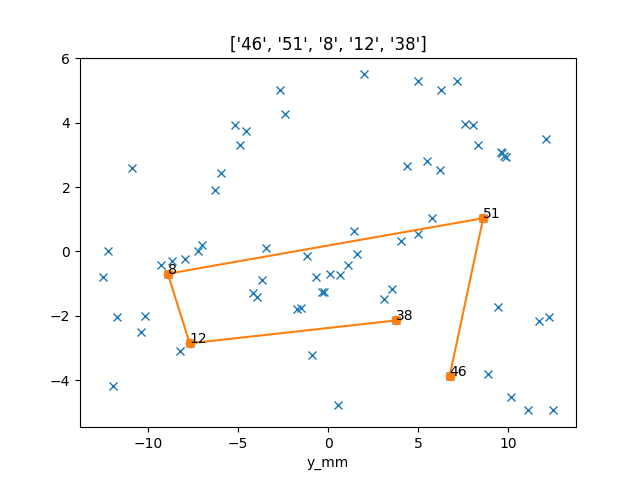

Internal-count,x_mm,y_mm,ra,dec,ra_diff,dec_diff,angular_distance
str2,float64,float64,float64,float64,float64,float64,float64
46,6.7589561,-3.858979,32.350896,-5.779373,-158.35059581807621,-416.94479999999993,446.0021047517373
51,8.6160157,1.0303866,32.395107,-5.663555,1493.6462660911948,147.22560000000016,1500.8845876693945
8,-8.8972191,-0.6960435,31.97817,-5.704451,-103.92956391966716,184.38480000000155,211.6579994414876
12,-7.6793793,-2.8581218,32.007183,-5.755669,-977.1719245924244,-60.75359999999961,979.0587163825378
38,3.7831595,-2.1462593,32.279995,-5.738793,0.0,0.0,0.0
38,3.7831595,-2.1462593,32.279995,-5.738793,977.2008927142359,60.75359999999961,979.0876286801196
12,-7.6793793,-2.8581218,32.007183,-5.755669,103.92024195489533,-184.38480000000155,211.6534222709488
8,-8.8972191,-0.6960435,31.97817,-5.704451,-1493.5401575837075,-147.22560000000016,1500.7789909278865
51,8.6160157,1.0303866,32.395107,-5.663555,158.38266949242558,416.94479999999993,446.0134933413863


In [12]:
slits = ['46', '51', '14', '8', '12', '16', '38', '44']  #2018
slits = ['46', '51', '19', '8', '12', '10', '38', '43']  # 2022 because 44 and 14 are not visible in 213.9. need to bee thought
slits = ['46', '51',  '8', '12','38']  # 2022 because 44 and 14 are not visible in 213.9. need to bee thought
# mask = F1.to_pandas()['Internal-count'].isin(slits)
F1p = F1.to_pandas()
from functools import reduce
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# selected_slits = F1[mask.values]['Internal-count',"x_mm","y_mm","ra","dec"]
selected_slits = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1p[F1p['Internal-count'] == i],slits))))

plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(slits)
plt.show()

selected_slits = selected_slits['Internal-count',"x_mm","y_mm","ra","dec"]
slit_path = vstack((selected_slits,selected_slits[::-1]) )
slit_path["ra_diff"] = list((slit_path["ra"][:-1] - slit_path["ra"][1:])*np.cos(slit_path["dec"][:-1]*np.pi/180)) + [0]
slit_path["dec_diff"] = list((slit_path["dec"][:-1] - slit_path["dec"][1:])) + [0]
# slit_path["ra_diff"] = [0] +list((slit_path["ra"][:-1] - slit_path["ra"][1:])*np.cos(slit_path["dec"][1:]*np.pi/180)) 
# slit_path["dec_diff"] = [0] + list((slit_path["dec"][:-1] - slit_path["dec"][1:])) 

slit_path["ra_diff"] *= 3600
slit_path["dec_diff"] *= 3600
slit_path["angular_distance"] = np.sqrt(slit_path["ra_diff"]** 2 + slit_path["dec_diff"]** 2)
try:
    slit_path.to_pandas().to_clipboard()
except Exception:
    pass
slit_path


# selected_slits

In [13]:

moves, flags, slit_coords = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)
moves = pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"])#,dtype=[("EL",float),("CE",float),("UV_image",float)])
assert moves.sum(axis=0)[0] <0.1
assert moves.sum(axis=0)[1] <0.1

# slit_path['lon'] = [s.lon.deg*3600 for s in slits_coord]
# slit_path['lat'] =  [s.lat.deg*3600 for s in slits_coord]
# slit_path
print("(They have been copied to clipboard, paste it in the spreadsheet)")
moves.to_clipboard()
moves 



slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [ 3.7831595 -2.1462593]

targets local coords in siderostat local frame:
EL: 152.4 arcsec ; CE: 253.0 arcsec
EL: 360.1 arcsec ; CE: 330.0 arcsec
EL: 286.8 arcsec ; CE: -395.5 arcsec
EL: 194.9 arcsec ; CE: -345.0 arcsec
EL: 225.2 arcsec ; CE: 129.7 arcsec

siderostat moves sequence: 
(They have been copied to clipboard, paste it in the spreadsheet)


,EL,CE,UV_image
0,0.000000,-30.000000,0.0
1,-0.000000,30.000000,1.0
2,152.429165,253.010929,1.0
3,207.661373,76.995310,1.0
4,-73.339778,-725.553211,1.0
5,-91.827119,50.515174,1.0
6,30.301967,474.692092,1.0
7,-0.000000,30.000000,0.0
8,0.000000,-30.000000,1.0
9,-30.301967,-474.692092,1.0


observed slits position :

In [14]:

slits_coord_obs_det = np.array([
[1744.5149,	709.2633],
[2074.3496,	567.48754],
[1959.6651,	1885.5387],
[1813.3748,	1795.4066],
[1856.6138,	932.35271],
[1856.4786,	931.65825],
[1813.6749,	1794.3482],
[1959.5905,	1885.554],
[2071.5012,	576.32861],
[1744.3718,	708.52823]])

slit_path["x_det_obs"] = slits_coord_obs_det[:,0]
slit_path["y_det_obs"] = slits_coord_obs_det[:,1]
#TODO should add difference
slit_path
# slit_path.write("/tmp/slit.csv",overwrite=True)



Internal-count,x_mm,y_mm,ra,dec,ra_diff,dec_diff,angular_distance,x_det_obs,y_det_obs
str2,float64,float64,float64,float64,float64,float64,float64,float64,float64
46,6.7589561,-3.858979,32.350896,-5.779373,-158.35059581807621,-416.94479999999993,446.0021047517373,1744.5149,709.2633
51,8.6160157,1.0303866,32.395107,-5.663555,1493.6462660911948,147.22560000000016,1500.8845876693945,2074.3496,567.48754
8,-8.8972191,-0.6960435,31.97817,-5.704451,-103.92956391966716,184.38480000000155,211.6579994414876,1959.6651,1885.5387
12,-7.6793793,-2.8581218,32.007183,-5.755669,-977.1719245924244,-60.75359999999961,979.0587163825378,1813.3748,1795.4066
38,3.7831595,-2.1462593,32.279995,-5.738793,0.0,0.0,0.0,1856.6138,932.35271
38,3.7831595,-2.1462593,32.279995,-5.738793,977.2008927142359,60.75359999999961,979.0876286801196,1856.4786,931.65825
12,-7.6793793,-2.8581218,32.007183,-5.755669,103.92024195489533,-184.38480000000155,211.6534222709488,1813.6749,1794.3482
8,-8.8972191,-0.6960435,31.97817,-5.704451,-1493.5401575837075,-147.22560000000016,1500.7789909278865,1959.5905,1885.554
51,8.6160157,1.0303866,32.395107,-5.663555,158.38266949242558,416.94479999999993,446.0134933413863,2071.5012,576.32861


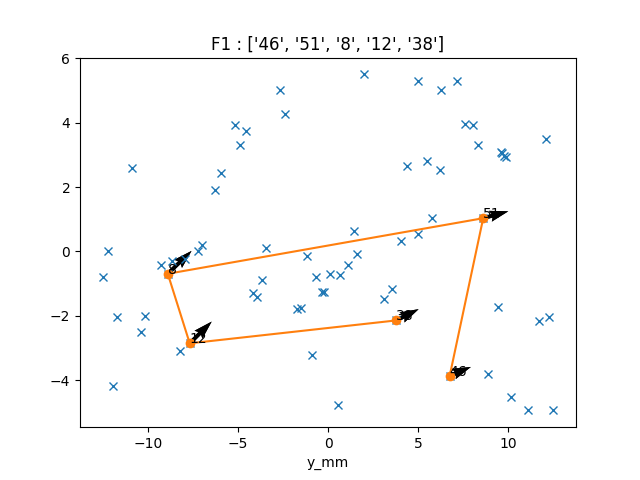

In [15]:
# TODO create some quiver of the error
plt.figure()
plt.plot(F1["x_mm"],F1["y_mm"],"x")
plt.plot(selected_slits["x_mm"],selected_slits["y_mm"],"-o")
for s in selected_slits:
    plt.text(s["x_mm"],s["y_mm"],s["Internal-count"])
plt.quiver(slit_path["x_mm"],slit_path["y_mm"],slit_path["x_det_obs"],slit_path["y_det_obs"])
plt.xlabel("x_mm")
plt.xlabel("y_mm")
plt.title(Field + " : %s"%(slits))
plt.show()

In [16]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139
print("wave: ", obs_wave)
slits_coord_valid = [slit_coords[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


### look at siderostat frame hysteresis 

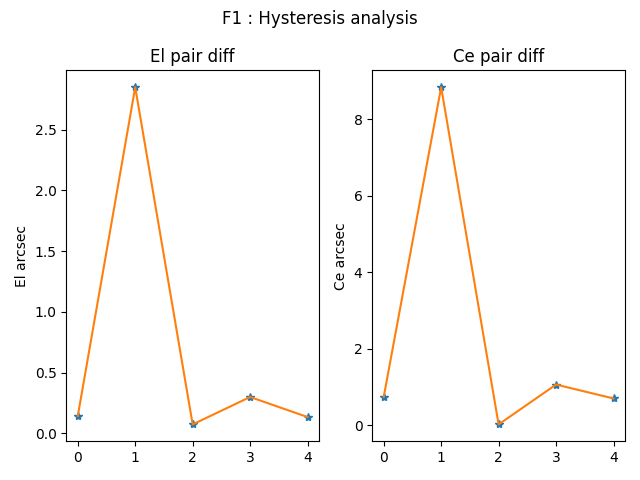

In [17]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
ax0.plot(np.abs(pair_diff[:,0]),'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
ax1.plot(np.abs(pair_diff[:,1]),'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle(Field + " : Hysteresis analysis")
fig.tight_layout()


## 11- Note open-mask guider ref point
## 12- Update model with observed slit positions

In [18]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )



Fitting rotation, translation and magnification
gamma: 1.0256783356512071
theta: -20.55693768087474 arcmin
dx: 19.25874181260397 arcsec
dy: -227.1401915142367 arcsec
variances: [4.90590218e-04 1.68652494e+00 3.97150246e-01 3.97150246e-01]

residuals in arcsec: [[-3.19576617  0.93842606]
 [ 4.92539735 -2.34725217]
 [ 1.92138789  0.12911373]
 [-1.07761537 -0.03459518]
 [-0.87917788 -2.2094097 ]
 [-1.05063783 -2.97470156]
 [-0.66930756 -1.21116888]
 [ 1.82620789  0.14372844]
 [ 1.58192237  7.43639429]
 [-3.38241066  0.12946496]]
max residual in EL,CE 4.9, 7.4 arcsec
mean residual in EL,CE 2.4, 2.8 arcsec


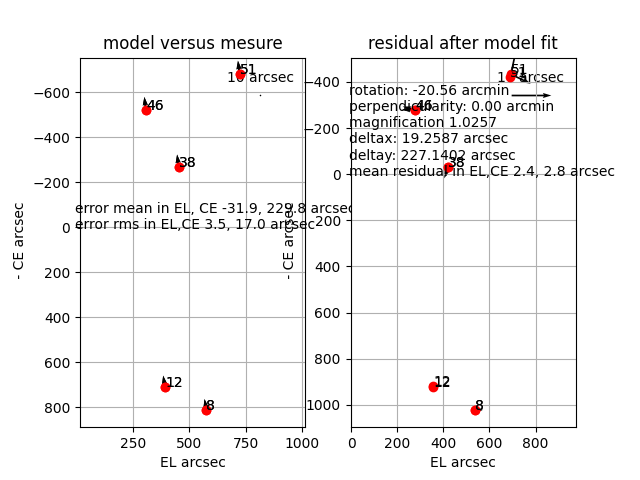

After updating:
    mask_rotation: -20.55693768087474 arcmin
    FOV center in guider: 1377.2359789723296 x 352.9709380356736 pix = 670.9352316661694 arcsec x -174.0695527362749 arcsec arcsec
    mask_magnification correction: 1.0256783356512071  
    


In [19]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor, residuals = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

### save corrected model for future use (eg redo the clalib on same field)

In [20]:
G2UVcor.save(filename="Calibration/Mappings/2022/XY/%s_XY_prep.pkl"%(Field))

Dumping to Calibration/Mappings/2022/XY/F1_XY_prep.pkl


## 13 - Rotate carousel to science mask
## 14 - Note open-mask guider ref point
## 15 - Check corrected model through science mask

In [21]:
CEg = 1.0187
Elg = 1.0090
slits
moves, flags, slit_coords = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True, CEg = CEg, Elg = Elg)
moves = pd.DataFrame(np.hstack((moves,flags[:,None])), columns=["EL","CE","UV_image"])
print("(They have been copied to clipboard, paste it in the spreadsheet)")
moves.to_clipboard()
moves
moves["UV_image"] = moves["UV_image"].astype(bool)

from astropy.table import hstack 
# Table.from_pandas(a[moves_tab["UV_image"]])[2:]
new_cat = hstack((slit_path,Table.from_pandas(moves[moves["UV_image"]])[2:]))
print(Elg,CEg)
new_cat["El_sky"] = new_cat["EL"]  * 2 * Elg 
new_cat["Cel_sky"] = new_cat["CE"] * 2 * CEg 
new_cat["Frame_angular_distance"] = np.sqrt(new_cat["El_sky"]**2 + new_cat["Cel_sky"]**2)
new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]
# new_cat
new_cat.to_pandas().to_clipboard()
new_cat

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [ 3.7831595 -2.1462593]

targets local coords in siderostat local frame:
EL: 163.5 arcsec ; CE: 374.6 arcsec
EL: 374.9 arcsec ; CE: 455.6 arcsec
EL: 304.6 arcsec ; CE: -296.7 arcsec
EL: 210.6 arcsec ; CE: -245.0 arcsec
EL: 238.5 arcsec ; CE: 247.2 arcsec

siderostat moves sequence: 
(They have been copied to clipboard, paste it in the spreadsheet)
1.009 1.0187


/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_90239/1599294558.py:18: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["frame_divided_sky"] = new_cat["Frame_angular_distance"] / new_cat["angular_distance"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_90239/1599294558.py:19: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_90239/1599294558.py:19: RuntimeWarning: invalid value encountered in true_divide
  new_cat["EL_dec_ratio"] =   new_cat["El_sky"] / new_cat["dec_diff"]
/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_90239/1599294558.py:20: RuntimeWarning: divide by zero encountered in true_divide
  new_cat["CE_ra_ratio"] =   new_cat["Cel_sky"] / new_cat["ra_diff"]


Internal-count,x_mm,y_mm,ra,dec,ra_diff,dec_diff,angular_distance,x_det_obs,y_det_obs,EL,CE,UV_image,El_sky,Cel_sky,Frame_angular_distance,frame_divided_sky,EL_dec_ratio,CE_ra_ratio
str2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64
46,6.7589561,-3.858979,32.350896,-5.779373,-158.35059581807621,-416.94479999999993,446.0021047517373,1744.5149,709.2633,211.41224351939667,81.0476242639653,True,426.6299074221424,165.1264296754029,457.4711091253431,1.0257151350888578,-1.0232287521565024,-1.0427900749114403
51,8.6160157,1.0303866,32.395107,-5.663555,1493.6462660911948,147.22560000000016,1500.8845876693945,2074.3496,567.48754,-70.29511170157183,-752.356380844243,True,-141.85553541377192,-1532.8508903320605,1539.4008071062322,1.0256623458947276,-0.9635249264650425,-1.0262475963224296
8,-8.8972191,-0.6960435,31.97817,-5.704451,-103.92956391966716,184.38480000000155,211.6579994414876,1959.6651,1885.5387,-94.01481186247273,51.79546924198091,True,-189.72189033846993,105.5280890336119,217.09576976230636,1.0256913054794417,-1.0289453921281382,-1.015380850776785
12,-7.6793793,-2.8581218,32.007183,-5.755669,-977.1719245924244,-60.75359999999961,979.0587163825378,1813.3748,1795.4066,27.94963207472453,492.1211723769399,True,56.4023575267941,1002.6476766007773,1004.2328362125575,1.0257125741375694,-0.9283788537106354,-1.026070900490698
38,3.7831595,-2.1462593,32.279995,-5.738793,0.0,0.0,0.0,1856.6138,932.35271,0.0,-30.0,True,0.0,-61.122,61.122,inf,nan,-inf
38,3.7831595,-2.1462593,32.279995,-5.738793,977.2008927142359,60.75359999999961,979.0876286801196,1856.4786,931.65825,-27.94963207472453,-492.1211723769399,True,-56.4023575267941,-1002.6476766007773,1004.2328362125575,1.025682285012972,-0.9283788537106354,-1.0260404836674488
12,-7.6793793,-2.8581218,32.007183,-5.755669,103.92024195489533,-184.38480000000155,211.6534222709488,1813.6749,1794.3482,0.0,30.0,True,0.0,61.122,61.122,0.28878342407218194,-0.0,0.5881626028789355
8,-8.8972191,-0.6960435,31.97817,-5.704451,-1493.5401575837075,-147.22560000000016,1500.7789909278865,1959.5905,1885.554,-0.0,-30.0,True,-0.0,-61.122,61.122,0.04072684943584538,0.0,0.04092424277287927
51,8.6160157,1.0303866,32.395107,-5.663555,158.38266949242558,416.94479999999993,446.0134933413863,2071.5012,576.32861,-211.41224351939667,-81.0476242639653,True,-426.6299074221424,-165.1264296754029,457.4711091253431,1.0256889442920663,-1.0232287521565024,-1.0425789021272927



## 16 - Note science-mask guider ref point
## 17 - Go through the Star sequence 
gc - s8 - s25 - s31

In [22]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits').to_pandas()

stars = [8, 25, 31]
selected_stars = Table.from_pandas((reduce(pd.DataFrame.append, map(lambda i: F1_stars[F1_stars['Internal count'] == i],stars))))

star_moves, flags, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)
star_moves = pd.DataFrame(np.hstack((star_moves,flags[:,None])), columns=["EL","CE","Image"])

stars_path = vstack((selected_stars,selected_stars[::-1]) )
selected_stars['lon'] = [s.lon.deg*3600 for s in stars_coord]
selected_stars['lat'] =  [s.lat.deg*3600 for s in stars_coord]
print("(They have been copied to clipboard, paste it in the spreadsheet)")
star_moves.to_clipboard()
star_moves




targets local coords in siderostat local frame:
EL: 158.5 arcsec ; CE: -70.6 arcsec
EL: 175.2 arcsec ; CE: 138.4 arcsec
EL: 105.3 arcsec ; CE: 195.5 arcsec

siderostat moves sequence: 
(They have been copied to clipboard, paste it in the spreadsheet)


,EL,CE,Image
0,-0.000000,30.000000,0.0
1,0.000000,-30.000000,1.0
2,158.496141,-70.625020,1.0
3,16.656252,209.050014,1.0
4,-69.845839,57.065121,1.0
5,-0.000000,30.000000,0.0
6,0.000000,-30.000000,1.0
7,69.845839,-57.065121,1.0
8,-16.656252,-239.050014,0.0
9,0.000000,30.000000,1.0


In [23]:
selection = selected_stars['Internal count',
 'RA',
 'DEC',
 'X',
 'Y',
 'GAIA gband',
 'SDSS gband',
 'SDSS rband',
 'Xguider',
 'Yguider']
# selection=vstack((selection,selection[::-1]))
selection.add_row(["-99",-99,-99,640,540,-99,-99,-99,-99,-99])
selection.to_pandas().to_clipboard()
selection

Internal count,RA,DEC,X,Y,GAIA gband,SDSS gband,SDSS rband,Xguider,Yguider
int64,float64,float64,float64,float64,int64,int64,int64,float64,float64
8,32.1014,-5.786504,-3.751016,-4.191964,11,11,11,954.7166340246686,952.1343510310977
25,32.221491,-5.776507,1.333233,-3.766303,9,--,--,990.2173692400569,476.91827039575276
31,32.254526,-5.815258,2.731668,-5.415391,--,12,12,836.6074480025399,344.4301880821129
-99,-99.0,-99.0,640.0,540.0,-99,-99,-99,-99.0,-99.0



## 18 - Through focus guide star 1
## 19 - Track mask to guider changes
------------------------------------------------------

below stuf is not in the XY calib procedure, we should remove it

Re-compute model (thermal drift) ?

In [101]:
# slits_coord_obs_det2 = np.array([
#        [1967.77672211,  420.883372  ],
#        [1634.94667484,  284.99941421],
#        [1460.30889342, 1343.63228178],
#        [1774.05043782, 1625.66456504],
#        [1918.36655798, 1531.24794446],
#        [1811.96613007, 1264.73988401],
#        [1858.73062442,  652.77625595],
#        [1539.37281284,  472.87952084],
# #retour
#        [1538.92830776,  467.65309777],
#        [1858.32109489,  647.99384259],
#        [1811.64481037, 1260.92668703],
#        [1917.94530091, 1526.91879826],
#        [1773.67417428, 1628.30043431],
#        [1459.76904708, 1347.27853125],
#        [1634.04334215,  281.33418915],
#        [1966.71028008,  414.34595604]])
    
# slits_coord_obs_det2

In [102]:
# valid = np.isfinite(slits_coord_obs_det2[:,0])
# #valid = np.array([True]*8 + [False]*8)
# try:
#     obs_wave = G2UV.mask_det_map.w[0]
# except TypeError:
#     obs_wave = 0.2139
# print("wave: ", obs_wave)

# #slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
# #slits_valid = np.array(slits + slits[::-1])[valid]

In [103]:
# mid  = len(slits_coord_obs_det2)//2
# pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
# pair_diff2

# fig, (ax0,ax1) = plt.subplots(1,2)
# # plt.subplot('120')
# ax0.plot(pair_diff2[:,0],'*')
# ax0.plot(np.abs(pair_diff2[:,0]),'-')
# ax0.set_title("El pair diff")
# ax0.set_ylabel("El arcsec")
# # plt.subplot('121')
# ax1.plot(pair_diff2[:,1],'*')
# ax1.plot(np.abs(pair_diff2[:,1]),'-')
# ax1.set_title("Ce pair diff")
# ax1.set_ylabel("Ce arcsec")
# fig.suptitle("Hysteresis analysis")
# fig.tight_layout()



In [104]:
# valid2 = np.array([True]*16)
# valid2[[0,1,-1,-2]] = False
# slits2 = np.array(slits_valid)[valid2]
# print(slits2)

In [105]:
# slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
# slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
# slits_valid2 = np.array(slits + slits[::-1])[valid2]

In [106]:
# weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

# G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [16]:
# G2UVcor2 = G2UVcor2[0]
# star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


In [17]:
# movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)